En este notebook trabajamos con el dataset "Estimation of Obesity Levels Based On Eating Habits and Physical Condition". Como su nombre lo indica, es un dataset centrado en explorar la relación que existe entre los hábitos alimenticios y la condición física con la obesidad de individuos colombianos, peruanos y mexicanos. Fue extraído del repositorio UC Irvine, al que se puede acceder desde el siguiente enlace: [https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

Estimation of Obesity Levels Based On Eating Habits and Physical Condition [Dataset]. (2019). UCI Machine Learning Repository. [https://doi.org/10.24432/C5H31Z](https://doi.org/10.24432/C5H31Z).

Realizamos tareas de clasificación, regresión y clusterización.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Descripción del dataset

In [ ]:
df=pd.read_csv('ObesidadOriginal.csv')
df.sample(10, random_state=42)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
544,Female,20.406871,1.755978,53.699561,yes,yes,2.000000,3.891994,Frequently,no,1.863930,no,2.870127,2.000000,no,Public_Transportation,Insufficient_Weight
1987,Female,26.000000,1.624950,111.004920,yes,yes,3.000000,3.000000,Sometimes,no,2.704315,no,0.000000,0.322666,Sometimes,Public_Transportation,Obesity_Type_III
420,Male,18.000000,1.850000,60.000000,yes,yes,3.000000,4.000000,Sometimes,no,2.000000,yes,2.000000,0.000000,Sometimes,Automobile,Insufficient_Weight
527,Female,21.000000,1.520000,42.000000,no,yes,3.000000,1.000000,Frequently,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Insufficient_Weight
196,Male,22.000000,1.750000,74.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,2.000000,Sometimes,Bike,Normal_Weight
744,Male,18.000000,1.738702,50.248677,yes,yes,1.871213,3.000000,Sometimes,no,1.283738,no,0.684879,1.487223,Sometimes,Public_Transportation,Insufficient_Weight
1635,Male,26.684354,1.819535,118.332689,yes,yes,1.975675,3.000000,Sometimes,no,2.357969,no,0.704236,0.010721,Sometimes,Public_Transportation,Obesity_Type_II
324,Female,30.000000,1.650000,71.000000,yes,yes,2.000000,3.000000,Sometimes,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_I
1449,Female,23.099906,1.571812,78.997166,yes,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.402614,0.000000,no,Public_Transportation,Obesity_Type_I
634,Female,23.000000,1.710129,50.079991,yes,yes,2.000000,3.000000,Frequently,no,2.685842,no,0.373186,2.000000,no,Public_Transportation,Insufficient_Weight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Descripción del Conjunto de Datos

Contamos con **2111 registros** y **17 columnas**, de las cuales **8 son numéricas**, **5 categóricas** y **4 booleanas**. Ademas, no hay valores faltantes en el dataset.

## Variables Numéricas  
1. **Age**: Edad.  
2. **Height**: Altura en el sistema métrico (m y cm).  
3. **Weight**: Peso en el sistema métrico (kg).  
4. **FCVC**: Frecuencia con la que consumes verduras en tus comidas. Se considera una respuesta continua en un espectro donde:  
   - **1**: Nunca  
   - **2**: A veces  
   - **3**: Siempre  
5. **NCP**: Número de comidas completas al día.  
6. **CH2O**: Cantidad de litros de agua consumidos al día.  
7. **FAF**: Frecuencia de actividad física en un rango de **0 a 3**.  
8. **TUE**: Tiempo dedicado al uso de dispositivos electrónicos como celulares, videojuegos y televisión.  

## Variables Categóricas  
9. **Gender**: Género.  
10. **CAEC**: ¿Consumes algo entre comidas principales?  
    - Posibles respuestas: **Siempre, Frecuentemente, A veces, No**.  
11. **CALC**: ¿Con qué frecuencia consumes alcohol?  
    - Posibles respuestas: **Siempre, Frecuentemente, A veces, No**.  
12. **MTRANS**: Método de transporte.  
    - Posibles respuestas:  
      - Public_Transportation  
      - Walking  
      - Automobile  
      - Motorbike  
      - Bike  
13. **NObeyesdad**: Nivel de obesidad.  
    - Posibles respuestas:  
      - **Normal_Weight**  
      - **Overweight_Level_I**  
      - **Overweight_Level_II**  
      - **Obesity_Type_I**  
      - **Insufficient_Weight**  
      - **Obesity_Type_II**  
      - **Obesity_Type_III**  
    Más adelante se explica cómo se determina esta variable.  

## Variables Booleanas o Binarias  
14. **SCC**: ¿Monitoreas las calorías que consumes diariamente? (**Sí/No**).  
15. **SMOKE**: ¿Fumas? (**Sí/No**).  
16. **FAVC**: ¿Consumes comida altamente calórica con frecuencia? (**Sí/No**).  
17. **family_history_with_overweight**: ¿Tienes antecedentes familiares de obesidad? (**Sí/No**).  


# Analisis exploratorio de datos

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


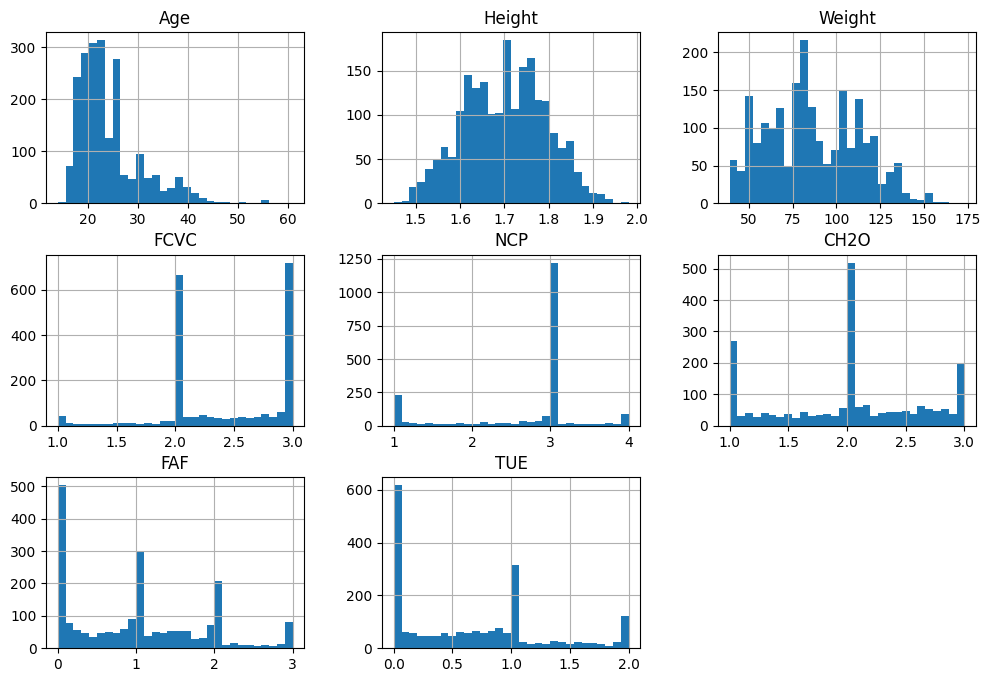

In [ ]:
df.hist(figsize=(12, 8), bins=30)
plt.show()

**Los histogramas nos dejan ver que las variables Age y Weight están sesgadas a la derecha lo que puede significar posibles oultiers por un valor mayor a los comunes. La variable Height tiene una distribucion aproximadamente normal. El resto de variables tienen distribuciones multimodales que suelen tener frecuencias mas altas alrededor de los numeros enteros, posiblemente por el como fue que se hicieron las encuestas.**

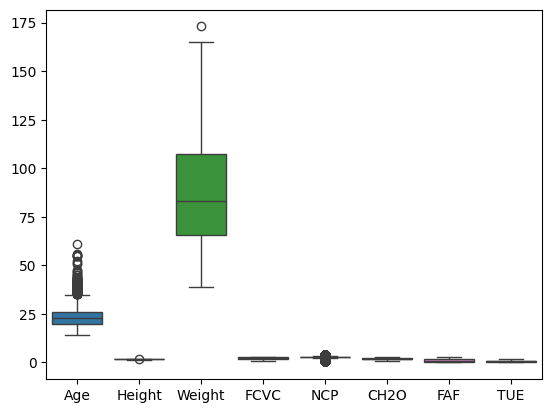

In [ ]:
sns.boxplot(df)
plt.show()

**Las graficas de caja indican que 4 variables tienen valores atipicos, exploremos a detalle cada una de estas.**

In [ ]:
#Esta funcion nos ayudara a calcular limites superiores e inferiores para el IQR
def Limites(X,c1=1.5,c2=1.5):
  Q3=X.quantile(0.75)
  Q1=X.quantile(0.25)
  IQR=Q3-Q1
  return Q3+c1*IQR,Q1-c2*IQR

**Variable Age**

Age
El limite superior es 35.079212
El limite inferior es 10.867980000000003


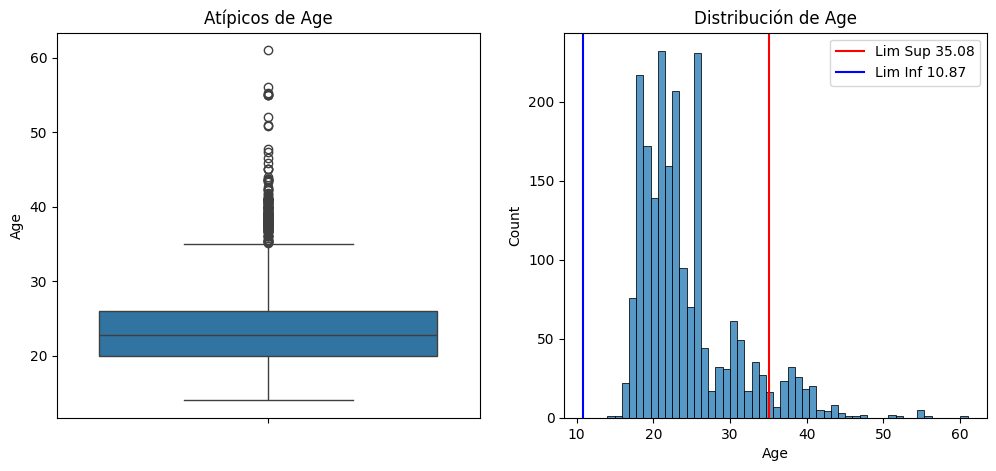

Height
El limite superior es 1.9761600000000001
El limite inferior es 1.4223039999999996


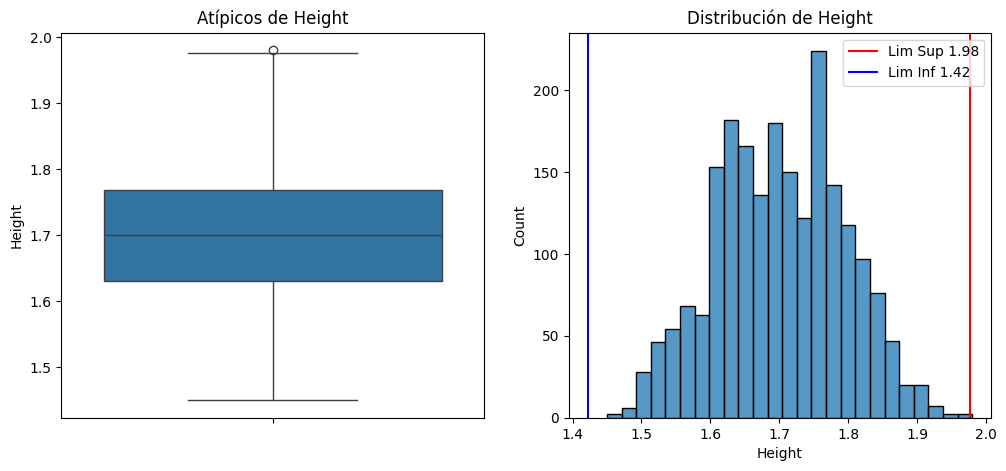

Weight
El limite superior es 170.3666905
El limite inferior es 2.537334499999993


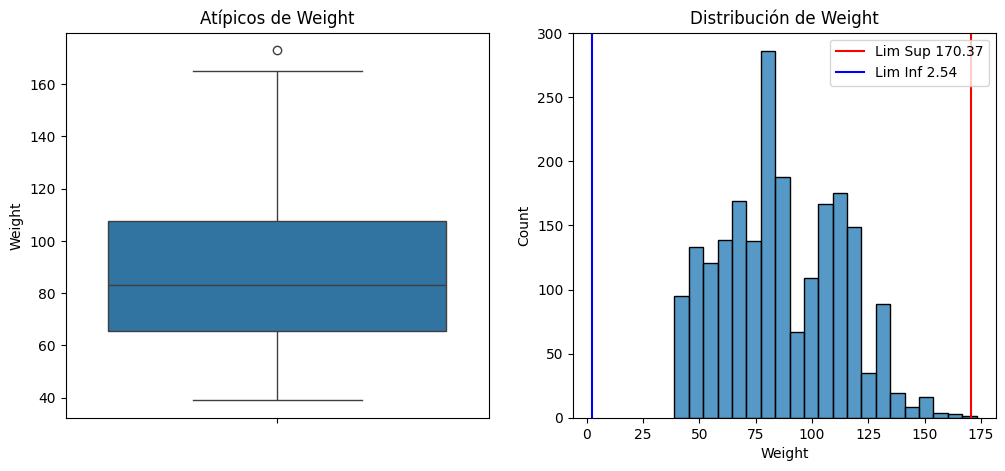

NCP
El limite superior es 3.5118929999999997
El limite inferior es 2.146845


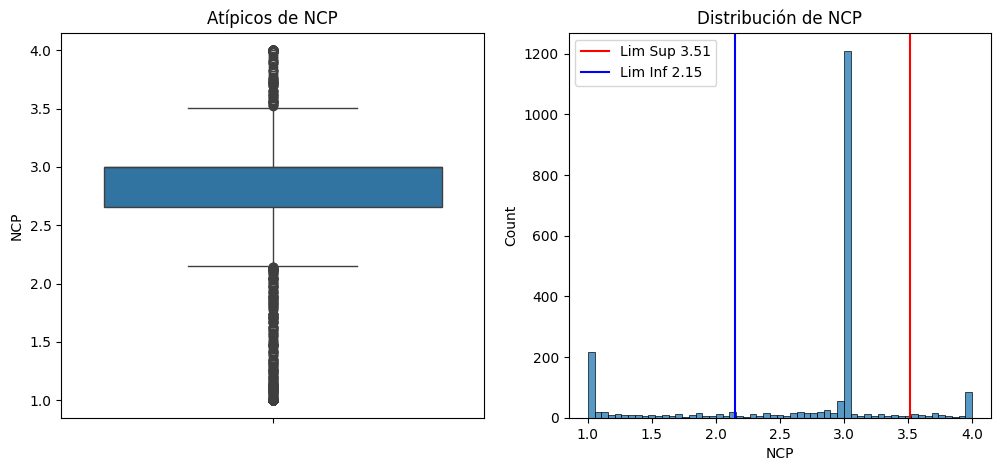

In [ ]:
"""
Plotearemos las gráficas de bigote de gato y los histogramas de las siguientes variables. Además, calcularemos el límite superior e inferior del método intercuartílico.

"""

C=["Age","Height","Weight","NCP"]

for i in C:
  print(f"{i}")
  Sup,Inf=Limites(df[i])
  print(f"El limite superior es {Sup}")
  print(f"El limite inferior es {Inf}")

  fig, axes = plt.subplots(1, 2, figsize=(12, 5))
  sns.boxplot(df[i],ax=axes[0])
  plt.grid()
  axes[0].set_title(f"Atípicos de {i}")

  sns.histplot(df[i],ax=axes[1])
  plt.axvline(x=Sup, color='red',label=f"Lim Sup {Sup:.2f}")
  plt.axvline(x=Inf, color='blue',label=f"Lim Inf {Inf:.2f}")
  plt.legend()
  plt.grid()
  axes[1].set_title(f"Distribución de {i}")
  plt.show()

**En las variables Age y NCP (Numero de comidas completas al dia) la eliminacion de datos supone un volumen de registros significativo, se consideran valores atipicos no por un error de registro o por ser valores extremadamente raros, si no que hay una cantidad mucho mayor de registros de menor valor. Consideramos que para estas dos no es necesario eliminar los valores que se consideran atipicos pues representan la naturaleza de un grupo de miembros que conforman al dataset, aunque son minoria son registros totalmente validos, las personas mayores serian borradas totalmente y las personas de bajos recursos que comen 1 vez al dia o las que comen mas de 3 tambien lo que seria perder informacion. Conclusion, permaneceran.**

**La variable Height (Altura) tiene un limite superior de 1.97m lo cual si se puede considerar atipico pues el promedio de altura en los paises de donde se recolecto la informacion esta bastante lejano, puede tratarse de errores de medicion o simplemente algo muy raro. Para la variable Weight (Peso) se consideran atipicos los valores arriba de 170 kilos, esta es una cifra que podria considerarse morbida y tiene ocurrencias muy raras por lo que puede considerarse atipico.**

Limpiaremos los valores atipicos con los limites de Height y Weight

In [ ]:
#Hacemos una copia del dataset
Copia=df.copy()

In [ ]:
for i in ["Height","Weight"]:
  Sup,Inf=Limites(Copia[i])
  Mascara =((df[i] <= Sup) & (df[i] >= Inf))
  df = df[Mascara]

In [ ]:
len(df)

2109

In [ ]:
Copia=df.copy()

**Tenemos un dataset de 2109 registros (3 menos) y las siguientes caracteristicas**

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,24.317638,1.701466,86.526870,2.418966,2.685330,2.007545,1.009833,0.657541
std,6.346792,0.093080,26.122450,0.533952,0.778347,0.612863,0.850723,0.609125
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.948140,1.630000,65.423942,2.000000,2.658639,1.579207,0.121585,0.000000
50%,22.789402,1.700216,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768235,107.218949,3.000000,3.000000,2.476002,1.666390,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


Veamos si hay clases desbalanceadas

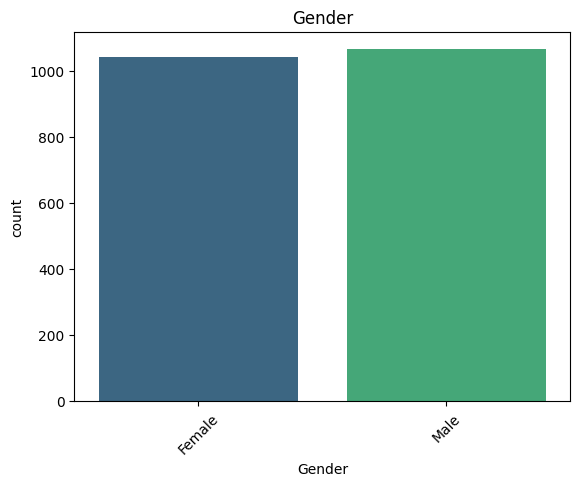

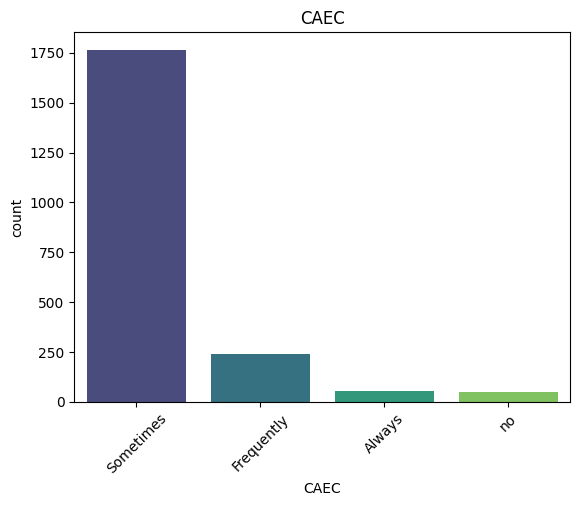

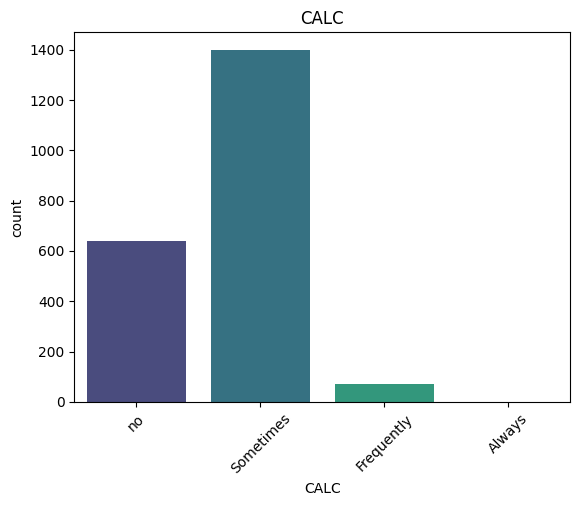

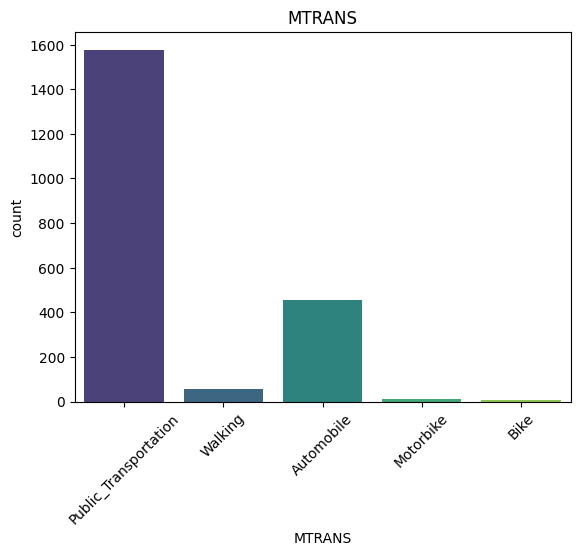

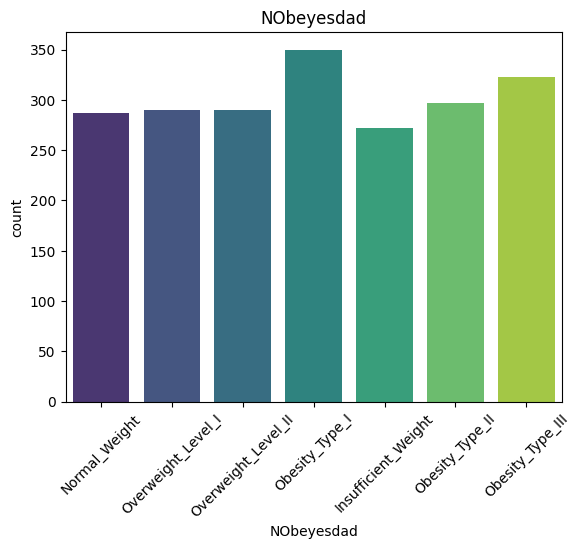

In [ ]:
C=["Gender","CAEC","CALC","MTRANS","NObeyesdad"]

for i in C:
  sns.countplot(data=df, x=i, hue=i, palette='viridis')
  plt.title(i)
  plt.xticks(rotation=45)
  plt.show()

**Algunas caracteristicas estan desbalanceadas pero la que nos resulta mas importante , el grado de obesidad, esta bastante bien balanceada por lo que no deberiamos encontrar grandes problemas.**

Veamos ahora si las boolenas estan desbalanceadas

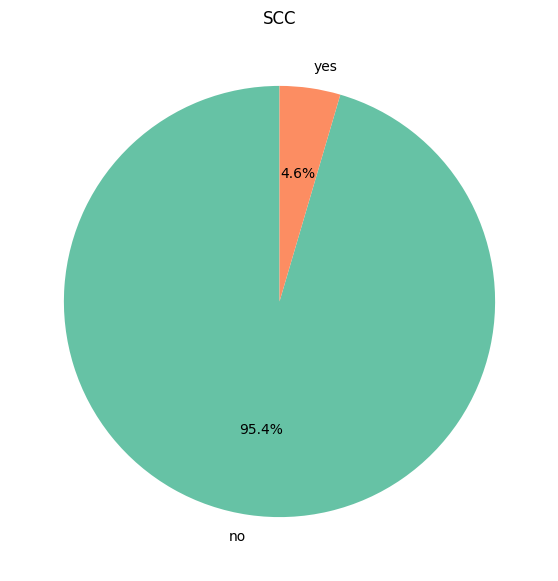

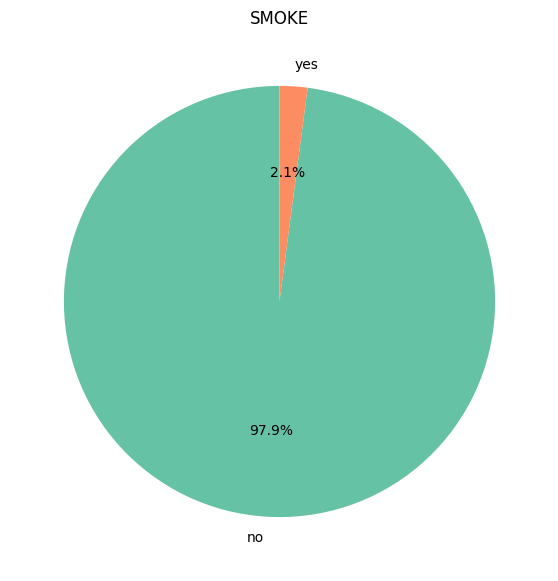

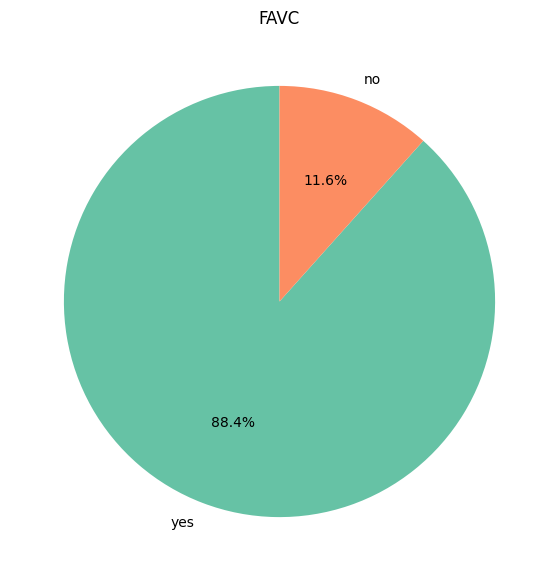

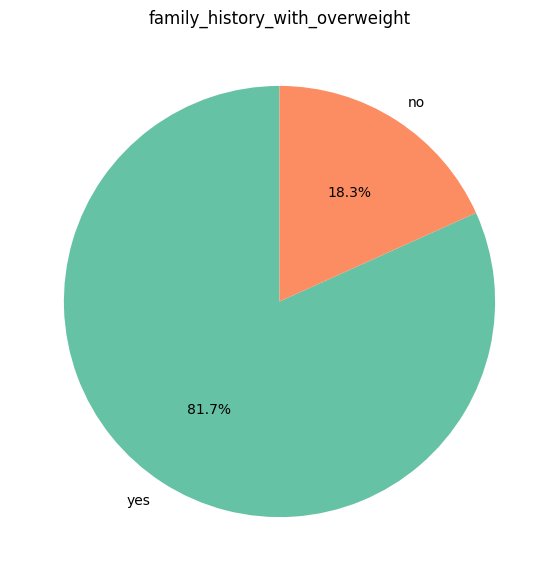

In [ ]:
c=["SCC","SMOKE","FAVC","family_history_with_overweight"]
for i in c:
  counts=df[i].value_counts()
  plt.figure(figsize=(7,7))  # Ajusta el tamaño de la figura
  plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
  plt.title(i)


Practicamente todas las boolenas estan desbalanceadas, hay que tener en cuenta esto por si despues queremos intentar predecir alguna de estas y tener en cuenta metricas mas especificas.

# Preparacion de los datos

In [ ]:
Copia=df.copy()

In [ ]:
Copia.shape

(2109, 17)

Primero hacemos one hot encoding con algunas variables binarias y la del metodo de transporte

In [ ]:
c=["Gender","family_history_with_overweight","SMOKE","SCC","FAVC","MTRANS"]
for i in c:
  df = pd.get_dummies(df, columns=[i], drop_first=True)

**Ahora hacemos un label encoding ordinal, ordinal porque si nos interesa asignarle un valor numerico con significa a la variable categorica, trataremos con adverbios de frecuencia por lo que haremos lo siguiente**

{"no":0,'Sometimes':1, 'Frequently':2, 'Always':3}

Tomando en cuenta que

no<sometimes<frequently<always

In [ ]:
Frecuencia={"no":0,'Sometimes':1, 'Frequently':2, 'Always':3}
df["CAEC"]=df["CAEC"].replace(Frecuencia);
df["CALC"]=df["CALC"].replace(Frecuencia);

<ipython-input-9-8b1770a3ef6d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CAEC"]=df["CAEC"].replace(Frecuencia);
<ipython-input-9-8b1770a3ef6d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["CALC"]=df["CALC"].replace(Frecuencia);


In [ ]:
df.sample(n=5,random_state=42)

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,FAVC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
442,26.000000,1.720000,65.000000,2.000000,3.000000,1,2.000000,0.000000,1.000000,1,Normal_Weight,True,True,False,False,True,False,False,False,True
1200,31.662814,1.848965,98.912261,2.399531,2.623079,1,2.535127,1.030752,0.606264,1,Overweight_Level_II,True,True,False,False,True,False,False,False,False
1431,22.226815,1.609068,83.785312,2.094184,2.735706,1,2.257922,2.230547,0.195339,0,Obesity_Type_I,False,True,False,False,True,False,False,True,False
563,16.270434,1.818268,47.124717,3.000000,3.286431,1,2.148146,2.458237,1.273333,1,Insufficient_Weight,False,False,False,False,True,False,False,True,False
411,20.000000,1.600000,65.000000,3.000000,3.000000,1,2.000000,0.000000,0.000000,1,Overweight_Level_I,False,False,False,True,False,False,False,True,False


In [ ]:
#df=Copia.copy()

Ahora hacemos la normalizacion y estandarizacion de las variables.

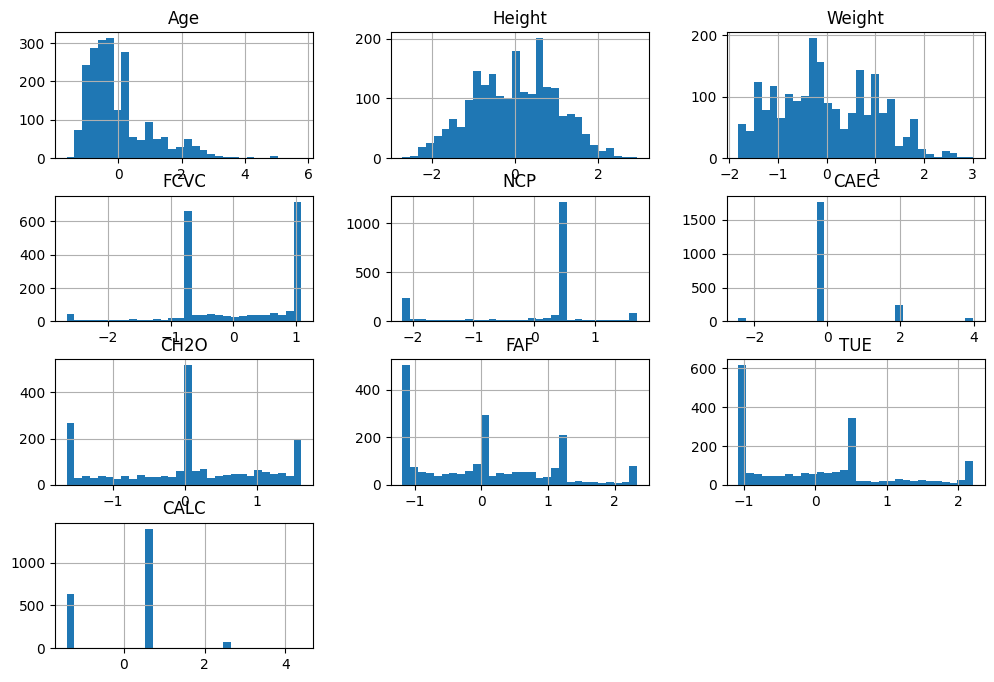

In [ ]:
from sklearn.preprocessing import StandardScaler

#Escalaremos las variables con Z-Score

c=['Height','Age', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']

for i in c:
  scaler = StandardScaler()
  df[i] = scaler.fit_transform(df[[i]])

df.hist(figsize=(12, 8), bins=30)
plt.show()

In [ ]:
# Identificar las columnas booleanas (True/False)
boolean_columns = df.select_dtypes(include='bool').columns
# Convertir solo las columnas booleanas a 1 y 0
df[boolean_columns] = df[boolean_columns].astype(int)

**Tenemos ya las variables normalizadas en escalas muy similares. Cambiamos los true y false por 1 y 0 respcetivamente. Una vez hecho el preprocesamiento tenemos el siguiente dataset**

In [ ]:
df.sample(n=10,random_state=42)

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,FAVC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
442,0.265136,0.199172,-0.824271,-0.784838,0.404376,-0.298810,-0.012314,-1.187312,0.562347,0.521474,Normal_Weight,1,1,0,0,1,0,0,0,1
1200,1.157580,1.585034,0.474241,-0.036408,-0.079997,-0.298810,0.861052,0.024595,-0.084202,0.521474,Overweight_Level_II,1,1,0,0,1,0,0,0,0
1431,-0.329508,-0.992908,-0.104975,-0.608406,0.064737,-0.298810,0.408634,1.435254,-0.758978,-1.418188,Obesity_Type_I,0,1,0,0,1,0,0,1,0
563,-1.268217,1.255163,-1.508721,1.088434,0.772462,-0.298810,0.229471,1.702961,1.011185,0.521474,Insufficient_Weight,0,0,0,0,1,0,0,1,0
411,-0.680448,-1.090353,-0.824271,1.088434,0.404376,-0.298810,-0.012314,-1.187312,-1.079742,0.521474,Overweight_Level_I,0,0,0,1,0,0,0,1,0
247,-0.680448,-0.875432,-1.322045,1.088434,0.404376,1.844695,-1.644386,2.339939,0.562347,-1.418188,Normal_Weight,0,0,0,0,1,0,0,0,0
529,-0.463527,0.226327,-1.366729,1.088434,0.770838,1.844695,-0.715603,-0.545433,-0.308395,0.521474,Insufficient_Weight,0,0,0,0,0,0,0,1,0
1820,0.265136,-0.794117,0.802404,1.088434,0.404376,-0.298810,1.109537,-1.187312,-0.405416,0.521474,Obesity_Type_III,0,1,0,0,1,0,0,1,0
1705,-0.167479,1.569614,1.360675,1.088434,-0.520180,-0.298810,-0.678857,-0.090592,-1.079742,0.521474,Obesity_Type_II,1,1,0,0,1,0,0,1,0
688,-1.038206,0.337387,-1.352047,-0.688771,-0.050725,-0.298810,0.571185,-0.844805,0.394759,0.521474,Insufficient_Weight,1,0,0,0,1,0,0,1,0


In [ ]:
df.shape

(2109, 20)

# Correlaciones

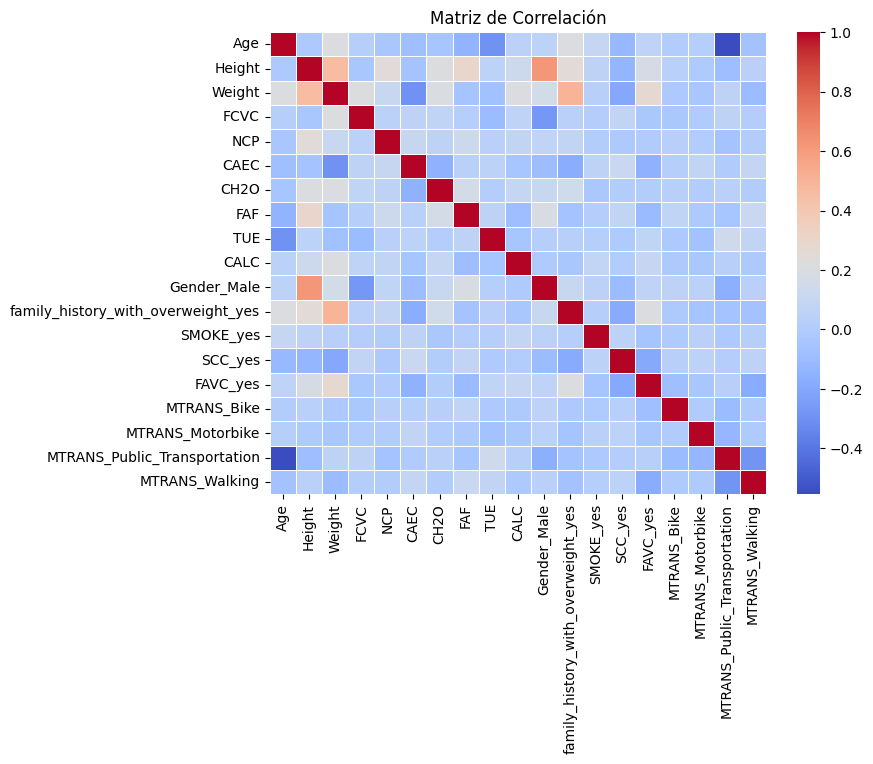

In [ ]:
corr_matrix = df.select_dtypes(include='number').corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

En la gráfica de correlación podemos ver que la variable "peso" tiene cierta correlación con las variables "altura", "historial familiar con obesidad" y "frecuencia con la que se come entre comidas principales". Esto nos ayudará más adelante con la regresión, pues la realizaremos sobre esa variable.


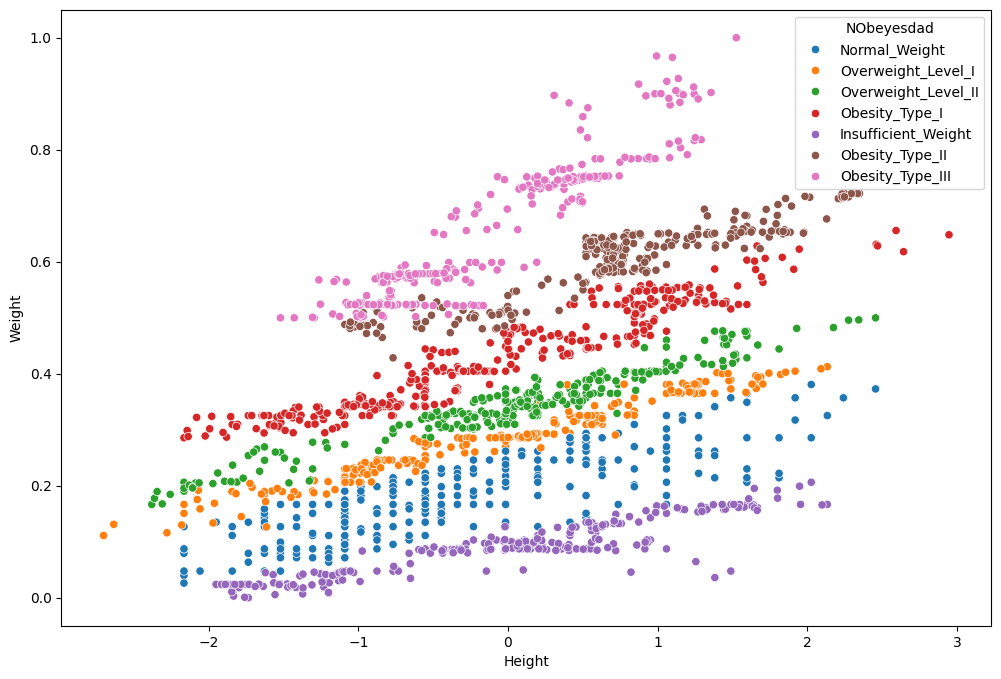

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df,x="Height",y="Weight",hue="NObeyesdad")
plt.show()

Las variables peso y altura ofrecen una buena visualizacion para separar las clases de la variable NObeyesdad, sobre la cual haremos la clasificacion.

# Clasificadores

Haremos clasificaciones intentando predecir la clase dada por el nivel de obesidad

## Utilizando una maquina de soporte vectorial

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df.to_csv("ObesidadLimpia.csv", index=False, encoding="utf-8")

In [ ]:
#Guardamos el nivel de obesidad como target
y=df["NObeyesdad"]
#El resto del dataset como caracteristicas
X=df.drop("NObeyesdad",axis=1)
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
X

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,Gender_Male,family_history_with_overweight_yes,SMOKE_yes,SCC_yes,FAVC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522851,-0.875432,-0.862561,-0.784838,0.404376,-0.29881,-0.012314,-1.187312,0.562347,-1.418188,0,1,0,0,0,0,0,1,0
1,-0.522851,-1.950036,-1.168884,1.088434,0.404376,-0.29881,1.619759,2.339939,-1.079742,0.521474,0,1,1,1,0,0,0,1,0
2,-0.207656,1.058855,-0.364787,-0.784838,0.404376,-0.29881,-0.012314,1.164189,0.562347,2.461135,1,1,0,0,0,0,0,1,0
3,0.422733,1.058855,0.018116,1.088434,0.404376,-0.29881,-0.012314,1.164189,-1.079742,2.461135,1,0,0,0,0,0,0,0,1
4,-0.365253,0.843934,0.125329,-0.784838,-2.165781,-0.29881,-0.012314,-1.187312,-1.079742,0.521474,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.526500,0.099556,1.718533,1.088434,0.404376,-0.29881,-0.456011,0.783562,0.408397,0.521474,0,1,0,0,1,0,0,1,0
2107,-0.367942,0.506336,1.807919,1.088434,0.404376,-0.29881,-0.003941,0.389828,-0.095687,0.521474,0,1,0,0,1,0,0,1,0
2108,-0.282667,0.545259,1.805867,1.088434,0.404376,-0.29881,0.076133,0.475445,-0.018479,0.521474,0,1,0,0,1,0,0,1,0
2109,0.006981,0.408182,1.792744,1.088434,0.404376,-0.29881,1.378765,0.151994,-0.117420,0.521474,0,1,0,0,1,0,0,1,0


In [ ]:
#Utilizamos la semilla 40 para la repetición de resultados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=40)

Accuracy: 0.9478672985781991
Classification Report:
                       precision    recall  f1-score   support

Insufficiente weight       0.92      1.00      0.96        57
       Normal weight       0.96      0.85      0.90        55
     Obesity level 1       0.99      0.96      0.98        84
     Obesity level 2       0.98      1.00      0.99        59
     Obesity level 3       1.00      1.00      1.00        56
  Overweight level 1       0.87      0.89      0.88        54
  Overweight level 2       0.90      0.91      0.90        57

            accuracy                           0.95       422
           macro avg       0.95      0.95      0.94       422
        weighted avg       0.95      0.95      0.95       422



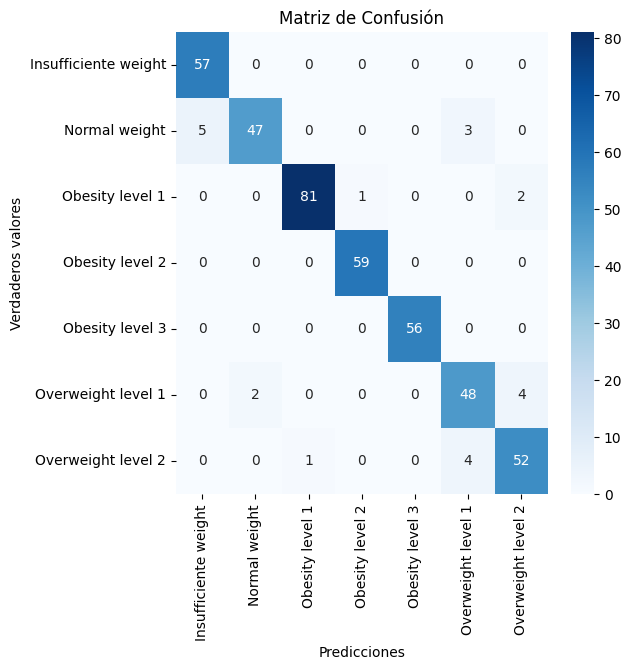

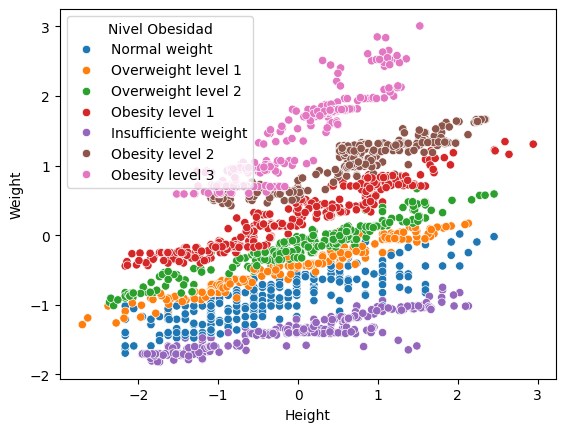

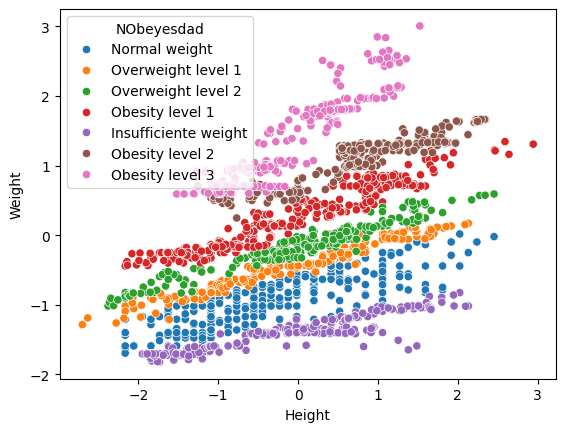

In [ ]:

# Los siguientes son los mejores resultados que obtuvimos con los diferentes kernels

#El mejor fue con el SVC linear y C=1
model = SVC(kernel='linear' , C=1)  #0.94

#model= SVC(kernel='poly', degree=2) #0.78

#model = SVC(kernel='rbf') #0.87

#model = SVC(kernel='sigmoid') #0.62

# Entrenamos el modelos
model.fit(X_train, y_train)

# Hacemos las predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Para visualizar las predicciones y ver de forma mas general la eficacia plotearemos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# Ploteamo la matriz de confusión con un heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos valores')
plt.show()

X["Nivel Obesidad"]=model.predict(X_scaled)


#Para terminar ploteamos el plano peso vs altura con los colores de las clases para visualizar el desempeño
sns.scatterplot(data=X,x="Height",y="Weight",hue="Nivel Obesidad")
plt.show()

sns.scatterplot(data=df,x="Height",y="Weight",hue="NObeyesdad")
plt.show()

Ahora usando validacion cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear', C=1) #C=1 0.9403 #C=1.5 0.9417 C=2 0.9465

# Aplicamos validación cruzada con 5 particiones (k=5)
cv_scores = cross_val_score(model, X_scaled, y, cv=6)

# Imprimimos los resultados
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-validated scores: [0.8125     0.94886364 0.94886364 0.96581197 0.97150997 0.98005698]
Mean Accuracy: 0.9379
Standard Deviation: 0.0572


## Ahora con un XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
#Guardamos el nivel de ¿obesidad como target
y=df["NObeyesdad"]

#Debemos hacerle label encoding a las clases en este metodo
y=y.map(dict(zip(y.unique(),[1,2,3,4,0,5,6])))
#El resto del dataset como caracteristicas
X=df.drop("NObeyesdad",axis=1)
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3, random_state=43)

In [ ]:
#Queremos ver el rendimiento promedio de este modelo por lo que guardamos las accuracy de 5 modelos iguales en un array

Puntuaciones=[]
for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2)
  model = xgb.XGBClassifier(
      objective='multi:softmax',  # Usamos softmax porque es un problema multiclase
      eval_metric='mlogloss',     # Usaremos mlogloss como métrica de evaluación
      use_label_encoder=False
  )
  #Entrenamos
  model.fit(X_train, y_train)

  #Hacemos predicciones
  y_pred = model.predict(X_test)

  #Evaluamos el modelo
  print("ACCURACY DEL CONJUNTO DE PRUEBA")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Classification Report:\n", classification_report(y_test, y_pred))

  Puntuaciones.append(accuracy_score(y_test, y_pred))
print(Puntuaciones)
print(f"Mean Accuracy: {sum(Puntuaciones)/len(Puntuaciones):.4f}")
print(f"Standard Deviation: {np.std(Puntuaciones):.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:46:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ACCURACY DEL CONJUNTO DE ENTRENAMIENTO
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00       228
           3       1.00      1.00      1.00       225
           4       1.00      1.00      1.00       281
           5       1.00      1.00      1.00       238
           6       1.00      1.00      1.00       261

    accuracy                           1.00      1687
   macro avg       1.00      1.00      1.00      1687
weighted avg       1.00      1.00      1.00      1687

ACCURACY DEL CONJUNTO DE PRUEBA
Accuracy: 0.985781990521327
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       0.96      0.96      0.96        51
           2       1.00      1.00      1.00        62
           3       1.00  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:46:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ACCURACY DEL CONJUNTO DE ENTRENAMIENTO
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       230
           2       1.00      1.00      1.00       243
           3       1.00      1.00      1.00       236
           4       1.00      1.00      1.00       274
           5       1.00      1.00      1.00       230
           6       1.00      1.00      1.00       261

    accuracy                           1.00      1687
   macro avg       1.00      1.00      1.00      1687
weighted avg       1.00      1.00      1.00      1687

ACCURACY DEL CONJUNTO DE PRUEBA
Accuracy: 0.9644549763033176
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.93      0.98      0.96        57
           2       0.94      0.96      0.95        47
           3       0.93 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:46:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ACCURACY DEL CONJUNTO DE ENTRENAMIENTO
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       223
           2       1.00      1.00      1.00       220
           3       1.00      1.00      1.00       235
           4       1.00      1.00      1.00       283
           5       1.00      1.00      1.00       238
           6       1.00      1.00      1.00       265

    accuracy                           1.00      1687
   macro avg       1.00      1.00      1.00      1687
weighted avg       1.00      1.00      1.00      1687

ACCURACY DEL CONJUNTO DE PRUEBA
Accuracy: 0.9549763033175356
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        49
           1       0.90      0.86      0.88        64
           2       0.91      0.91      0.91        70
           3       0.95 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ACCURACY DEL CONJUNTO DE ENTRENAMIENTO
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       228
           2       1.00      1.00      1.00       228
           3       1.00      1.00      1.00       228
           4       1.00      1.00      1.00       277
           5       1.00      1.00      1.00       247
           6       1.00      1.00      1.00       264

    accuracy                           1.00      1687
   macro avg       1.00      1.00      1.00      1687
weighted avg       1.00      1.00      1.00      1687

ACCURACY DEL CONJUNTO DE PRUEBA
Accuracy: 0.966824644549763
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        57
           1       0.93      0.88      0.90        59
           2       0.89      0.95      0.92        62
           3       0.98  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ACCURACY DEL CONJUNTO DE ENTRENAMIENTO
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       1.00      1.00      1.00       224
           2       1.00      1.00      1.00       231
           3       1.00      1.00      1.00       226
           4       1.00      1.00      1.00       273
           5       1.00      1.00      1.00       256
           6       1.00      1.00      1.00       255

    accuracy                           1.00      1687
   macro avg       1.00      1.00      1.00      1687
weighted avg       1.00      1.00      1.00      1687

ACCURACY DEL CONJUNTO DE PRUEBA
Accuracy: 0.9691943127962085
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.97      0.94      0.95        63
           2       0.93      0.97      0.95        59
           3       0.95 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:22:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


ACCURACY DEL CONJUNTO DE ENTRENAMIENTO
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       234
           3       1.00      1.00      1.00       231
           4       1.00      1.00      1.00       287
           5       1.00      1.00      1.00       241
           6       1.00      1.00      1.00       249

    accuracy                           1.00      1687
   macro avg       1.00      1.00      1.00      1687
weighted avg       1.00      1.00      1.00      1687


ACCURACY DEL CONJUNTO DE PRUEBA
Accuracy: 0.9715639810426541
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        53
           1       0.98      0.85      0.91        61
           2       0.95      0.96      0.96        56
           3       0.98

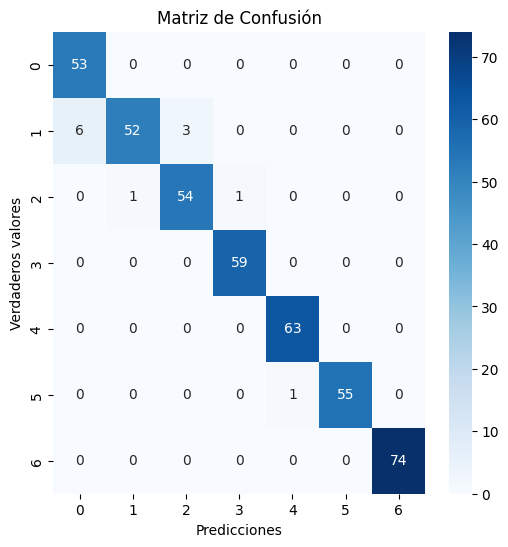

<ipython-input-129-3d61d7c73175>:62: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x="Height", y="Weight", hue="NObeyesdad", palette="deep", ax=ax2)


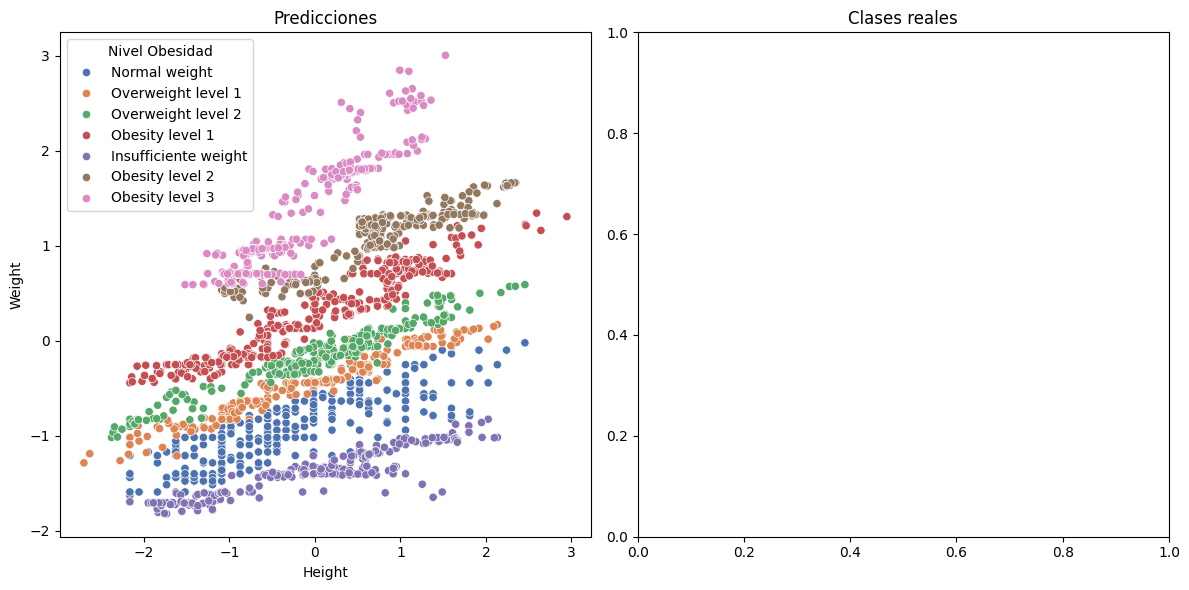

In [ ]:
#Hacemos un ultimo modelo para imprimir el reporte de metricas y las graficas comparando los puntos

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creamos el modelo
model = xgb.XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    use_label_encoder=False
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_pred = model.predict(X_test)

# Imprimimos accuray y el reporte de clasificación para el conjunto de prueba
print("\nACCURACY DEL CONJUNTO DE PRUEBA")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Obtenemos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

#Ploteamos la matriz de confusión con un heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos valores')
plt.show()

X["Nivel Obesidad"]=model.predict(X_scaled)

#Le ponemos los nombres correctos a los valores predichos
mapeo_clases = {0: 'Insufficiente weight', 1: 'Normal weight', 2: 'Overweight level 1',
                3: 'Overweight level 2', 4: 'Obesity level 1', 5: 'Obesity level 2', 6: 'Obesity level 3'}

X['Nivel Obesidad'] = X['Nivel Obesidad'].map(mapeo_clases)
#df["NObeyesdad"]=df["NObeyesdad"].map(mapeo_clases)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(data=X, x="Height", y="Weight", hue="Nivel Obesidad", palette="deep", ax=ax1)
ax1.set_title("Predicciones")

sns.scatterplot(data=df, x="Height", y="Weight", hue="NObeyesdad", palette="deep", ax=ax2)
ax2.set_title("Clases reales")

plt.tight_layout()

plt.show()

X=X.drop("Nivel Obesidad",axis=1)

Uno de los objetivos del proyecto es ver la importancia de las caracteristicas en el modelo para ver si podemos inferir cuales son las caracteristicas mas importantes en general para evitar o monitorear el sobrepeso.

                               Feature  Importance
10                         Gender_Male    8.654243
2                               Weight    5.218485
3                                 FCVC    3.702147
9                                 CALC    2.104381
1                               Height    2.098660
13                            FAVC_yes    1.961392
5                                 CAEC    1.663962
16                      MTRANS_Walking    1.339896
4                                  NCP    1.105877
0                                  Age    0.796814
12                             SCC_yes    0.587606
14                    MTRANS_Motorbike    0.571873
6                                 CH2O    0.556472
7                                  FAF    0.552799
8                                  TUE    0.535570
15        MTRANS_Public_Transportation    0.397222
11  family_history_with_overweight_yes    0.346794


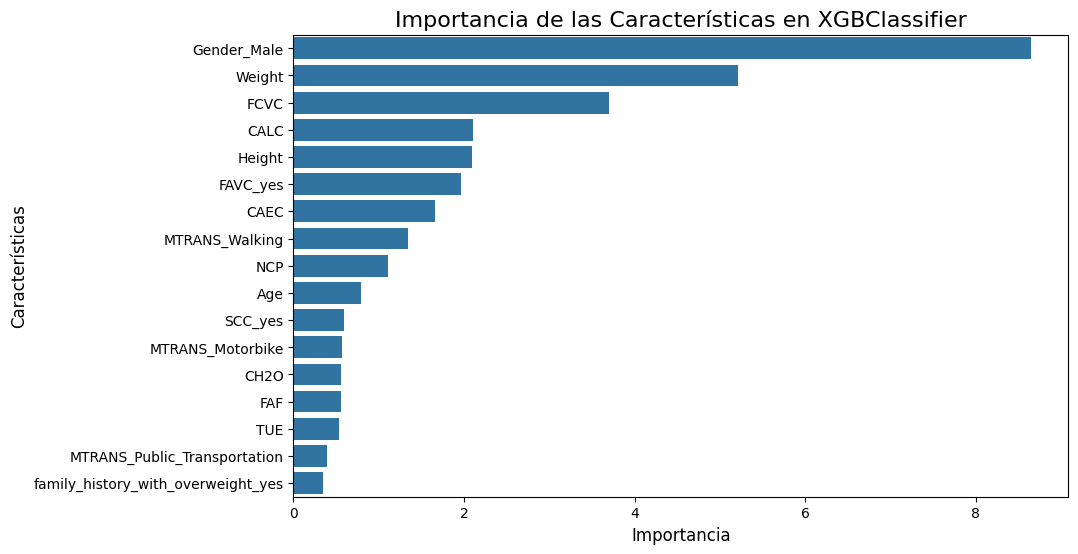

In [ ]:
# Obtenemos la importancia de las características de XGBoost con la importancia gain
importancias = model.get_booster().get_score(importance_type="gain")

# Hacemos un dataframe con las importancias
df_importancias = pd.DataFrame(importancias.items(), columns=["Variable", "Importancia"])

feature_names = X.columns  # Obtenemos los nombres de las columnas originales

# Mapeamos las características f0, f1, ... a los nombres reales
df_importancias["Feature"] = df_importancias["Variable"].apply(lambda x: feature_names[int(x[1:])] if x.startswith('f') else x)

# Ordenamos el dataframe por la importancia
df_importancias = df_importancias.sort_values(by="Importancia", ascending=False)

# Lo imprimimos
print(df_importancias)

#Ploteamos la grafica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x="Importancia", y="Variable", data=df_importancias)
plt.title("Importancia de las Características en XGBClassifier", fontsize=16)
plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Características", fontsize=12)
plt.show()


## Usando KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.8341232227488151
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85        53
           1       0.76      0.51      0.61        61
           2       0.73      0.73      0.73        56
           3       0.76      0.86      0.81        59
           4       0.79      0.89      0.84        63
           5       0.95      0.93      0.94        56
           6       0.99      1.00      0.99        74

    accuracy                           0.83       422
   macro avg       0.83      0.83      0.82       422
weighted avg       0.83      0.83      0.83       422



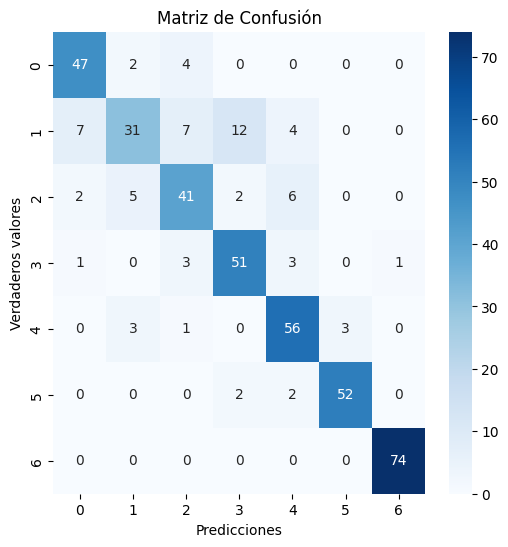

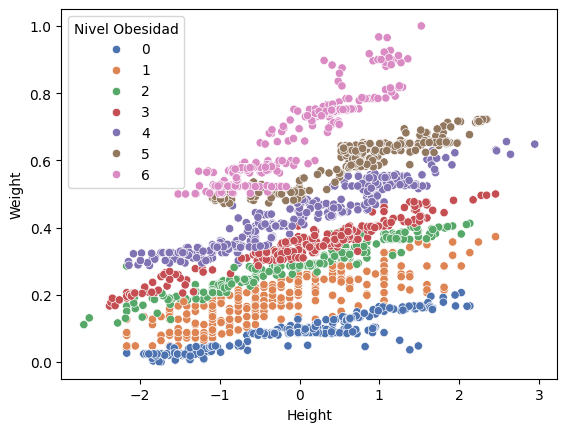

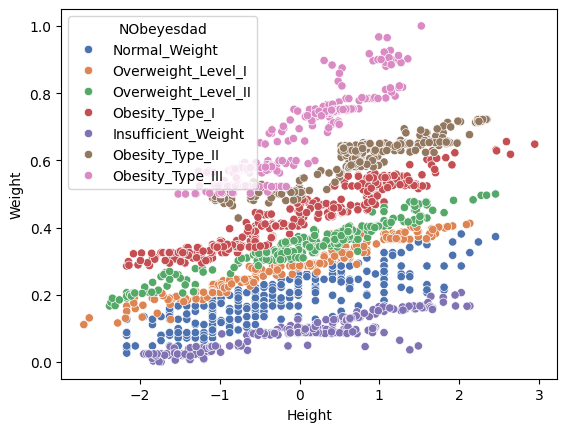

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#Lo haremos con un KNN, obtuvimos el mejor resultado usando 2 vecinos
knn = KNeighborsClassifier(n_neighbors=2 , weights='distance')

#Entrenamos
knn.fit(X_train, y_train)

#Predecimos
y_pred = knn.predict(X_test)

#Evaluamos
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#Sacamos la matriz de confusion
cm = confusion_matrix(y_test, y_pred)

#Visualizamos la matriz de confusion con el heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_pred), yticklabels=np.unique(y))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos valores')
plt.show()

X["Nivel Obesidad"]=model.predict(X_scaled)

sns.scatterplot(data=X,x="Height",y="Weight",hue="Nivel Obesidad",palette="deep")
plt.show()

sns.scatterplot(data=df,x="Height",y="Weight",hue="NObeyesdad",palette="deep")
plt.show()

In [ ]:
#Hacemos una validacion cruzada de 6 folds para verificar el modelo
model = KNeighborsClassifier(n_neighbors=2 , weights='distance')

cv_scores = cross_val_score(model, X_scaled, y, cv=6)

# Imprimir los resultados
print(f"Cross-validated scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-validated scores: [0.625      0.84375    0.86931818 0.86894587 0.87179487 0.91452991]
Mean Accuracy: 0.8322
Standard Deviation: 0.0950


# Regresiones

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, make_scorer, r2_score

Copia=df.copy()

#Volvemos numerica esta variable
df["NObeyesdad"]=df["NObeyesdad"].map(dict(zip(df["NObeyesdad"].unique(),[1,2,3,4,0,5,6])))

## Regresion lineal

In [ ]:
from sklearn.linear_model import LinearRegression

# Para la regresión usamos la variable peso, quitamos NObeyesdad porque suponemos que no conocemos esa variable
y = df["Weight"]
X = df.drop(["Weight", "NObeyesdad"], axis=1)

# Hacemos la división de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Creamos el modelo
model = LinearRegression()

# Ajustamos el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Realizamos predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostramos los resultados
print(f'Error cuadrático medio (MSE): {mse}')
print(f'R2: {r2}')


#Hacemos una validacion cruzada con 5 folds e imprimimos las metricas promedio
cv = KFold(n_splits=5, shuffle=True)
mse_scores = cross_val_score(LinearRegression(), X, y, cv=cv, scoring="r2")

print(f'R2 promedio: {np.mean(mse_scores)}')
print(f'R2 Desviación estándar: {np.std(mse_scores)}')

mse_scores = cross_val_score(LinearRegression(), X, y, cv=cv, scoring=make_scorer(mean_squared_error))
print(f'MSE promedio: {np.mean(mse_scores)}')
print(f'MSE Desviación estándar: {np.std(mse_scores)}')


Error cuadrático medio (MSE): 0.41447135184364364
R2: 0.5966852251906297
R2 promedio: 0.5514152247459218
R2 Desviación estándar: 0.012199584542209393
MSE promedio: 0.44838004051861846
MSE Desviación estándar: 0.017507530535380948


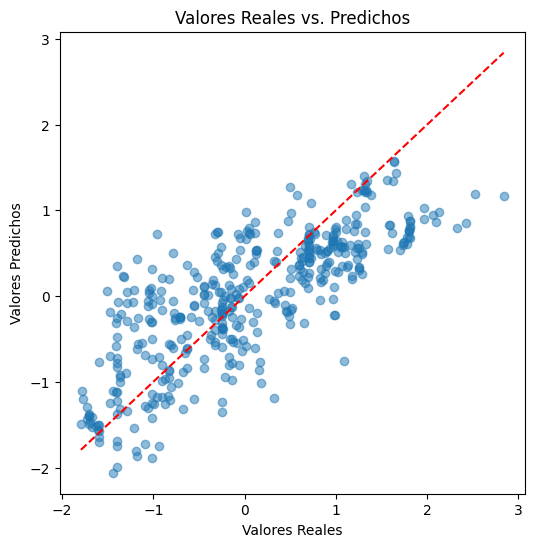

In [ ]:
# Ploteamos la recta ideal, entre mas cerca esten los puntos de la linea roja mejor sera el modelo
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea ideal
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Predichos")
plt.show()


Hacemos una validacion cruzada

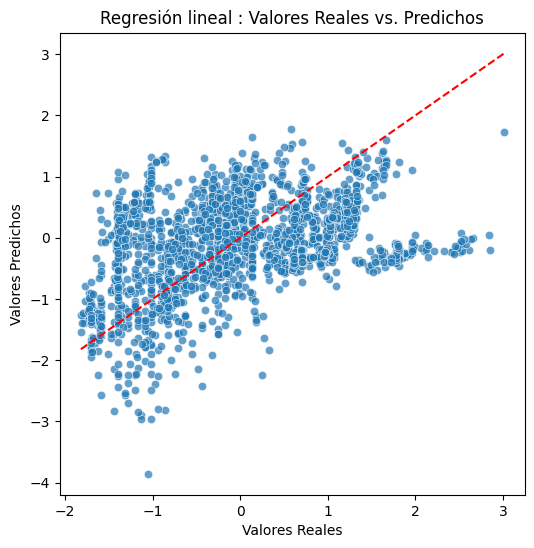

In [ ]:
# Generamos predicciones con validación cruzada de 5 folds
modelo = LinearRegression()
y_pred = cross_val_predict(modelo, X, y, cv=5)

# Graficamos valores reales vs. predichos de los 5 folds
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Línea perfecta
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Regresión lineal : Valores Reales vs. Predichos")
plt.show()

Probamos con un SVR

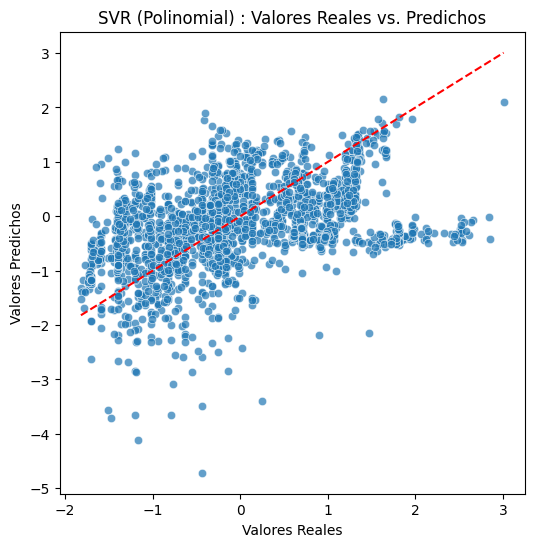

R² en cada fold: [0.69878828 0.71693766 0.6420745  0.68040575 0.73079192]
R² promedio: 0.6937996203168031
Desviación estándar: 0.030930792359034984
MSE promedio: 0.3051432546051925
MSE Desviación estándar: 0.028049723863553113


In [ ]:
from sklearn.svm import SVR


# Definir el modelo SVR
#modelo = SVR(kernel='rbf', C=2.5, epsilon=0.1)
modelo = SVR(kernel='poly', C=1.0, epsilon=0.1, degree=2)

# Configurar la validación cruzada con 5 folds y shuffle
kf = KFold(n_splits=5, shuffle=True, random_state=42)

y_pred = cross_val_predict(modelo, X, y, cv=5)

# Graficar valores reales vs. predichos
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Línea perfecta
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("SVR (Polinomial) : Valores Reales vs. Predichos")
plt.show()

# Aplicar validación cruzada con R^2 como métrica
scores = cross_val_score(modelo, X, y, cv=kf, scoring='r2')

# Mostrar resultados
print(f'R² en cada fold: {scores}')
print(f'R² promedio: {scores.mean()}')
print(f'Desviación estándar: {scores.std()}')

mse_scores = cross_val_score(modelo, X, y, cv=kf, scoring=make_scorer(mean_squared_error))
print(f'MSE promedio: {np.mean(mse_scores)}')
print(f'MSE Desviación estándar: {np.std(mse_scores)}')

# Ajustar el modelo completo con todos los datos
modelo.fit(X, y)

# Realizar predicciones con el modelo ajustado
y_pred = modelo.predict(X)




Probamos con un XGB Regression

In [ ]:
ListaR = []
ListaMSE = []

for i in range(1, 10):
    # Dividimos los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Creamos un objeto de DMatrix (formato optimizado de XGBoost)
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Definimos los parámetros del modelo
    params = {
        'objective': 'reg:squarederror',  # Definimos la tarea de regresión
        'colsample_bytree': 1,  # Mostramos las características para cada árbol
        'learning_rate': 0.1,  # Fijamos la tasa de aprendizaje
        'max_depth': 9,  # Establecemos la profundidad máxima de cada árbol
        'alpha': 1,  # Aplicamos regularización L1
        'n_estimators': 100  # Configuramos el número de árboles (estimadores)
    }

    # Entrenamos el modelo
    num_round = 100  # Fijamos el número de iteraciones (árboles)
    model = xgb.train(params, dtrain, num_round)

    # Realizamos predicciones
    y_pred = model.predict(dtest)

    # Evaluamos el modelo: Calculamos el error cuadrático medio (RMSE)
    rmse = mean_squared_error(y_test, y_pred)
    print(f"RMSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R²: {r2}")
    ListaR.append(r2)
    ListaMSE.append(rmse)

# Mostramos los resultados finales
print(f"R² promedio: {np.mean(ListaR)}")
print(f"MSE promedio: {np.mean(ListaMSE)}")
print(f"Desviación estándar R^2: {np.std(ListaR)}")
print(f"Desviación estándar MSE: {np.std(ListaMSE)}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.0047155315462269936
R²: 0.8883254789658509


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.0058074600663620595
R²: 0.8734932650109699


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.005320391406573401
R²: 0.8853114017407309


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.005409321471013175
R²: 0.8780276100793788


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.004544657838851191
R²: 0.8879482029240792


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.005768769495347644
R²: 0.8622920155001192


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.005026837757439404
R²: 0.8718406419844389


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.004501660052707493
R²: 0.8856430653118543


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 0.004735796519661121
R²: 0.8912731004922707
R² promedio: 0.8804616424455214
MSE promedio: 0.005092269572686942
Desviación estándar R^2: 0.009092629712332247
Desviación estándar MSE: 0.0004765262242541456


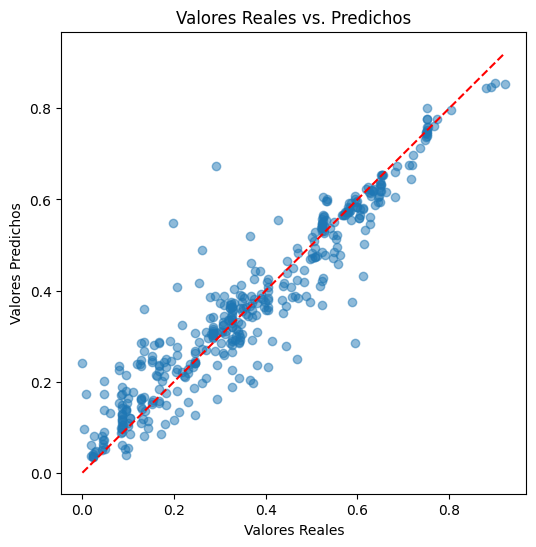

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Línea ideal
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Predichos")
plt.show()


Hasta ahora un XGB ha logrado el mejor desempeño, veamos si una red neuronal (mas adelante) puede lograr lo mismo.

# Agrupamiento

Usemos un K means para captar grupos desconocidos con las variables Peso y CALC

In [ ]:
from sklearn.cluster import KMeans

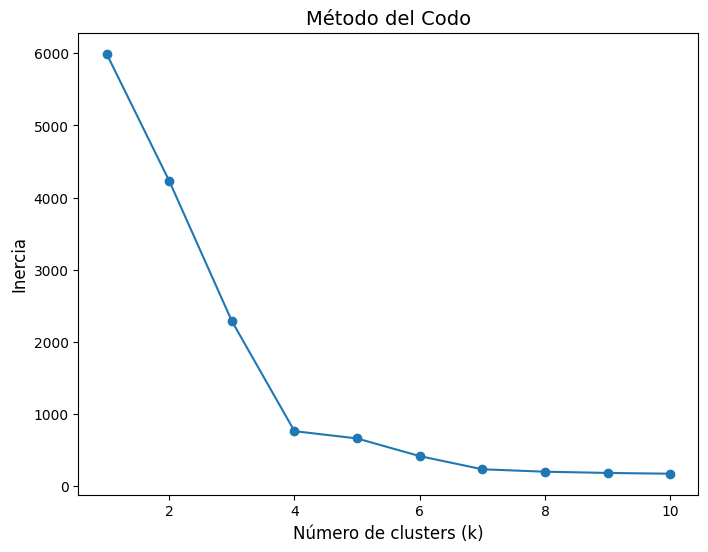

In [ ]:
#Para ver cual era la mejor K utilizamos el metodo del codo

Inercia = []  # Inercia para diferentes valores de k

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    Inercia.append(kmeans.inertia_)

# Graficamos la inercia para diferentes valores de k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), Inercia, marker='o')
plt.title("Método del Codo", fontsize=14)
plt.xlabel("Número de clusters (k)", fontsize=12)
plt.ylabel("Inercia", fontsize=12)
plt.show()

Llegamos a la conclusion de que 4 era el numero ideal para este caso

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


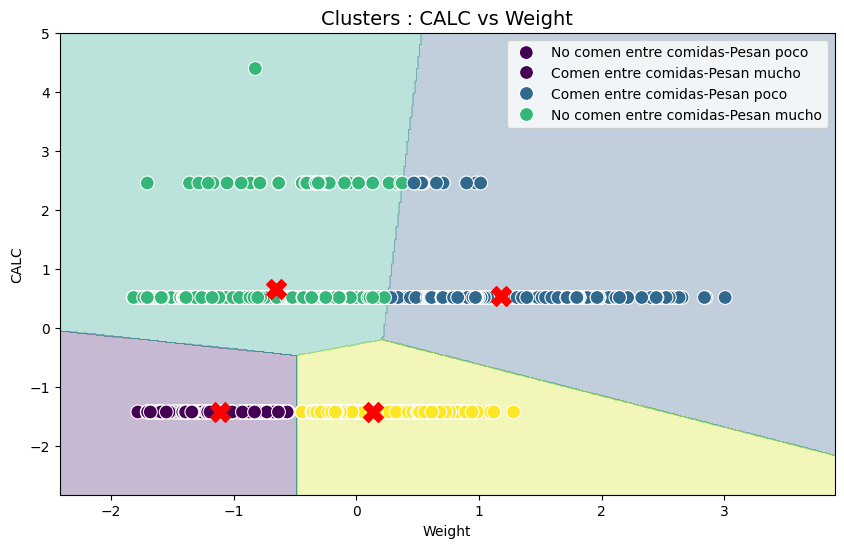

In [ ]:
from sklearn.cluster import KMeans

#Usamos CALC y Weight
X = df[["CALC", "Weight"]].copy()
k = 4

#Creamos y entrenamos el modelo
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)


clusters = kmeans.labels_

# Usaremos el centro de los clusters
centroids = kmeans.cluster_centers_
X['Cluster'] = clusters


# Creamos la malla para pintar de colores el plano
x_min, x_max = X['Weight'].min() -1, X['Weight'].max() +2
y_min, y_max = X['CALC'].min() -1, X['CALC'].max() -0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predecimos la malla
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Creamos el grafico
plt.figure(figsize=(10, 6))
plt.contourf(yy, xx, Z, alpha=0.3, cmap='viridis')
sns.scatterplot(x=X['Weight'], y=X['CALC'], hue=X['Cluster'], palette='viridis', s=100, marker='o')
plt.scatter(centroids[:, 1], centroids[:, 0], s=200, c='red', marker='X', label='Centroides')
plt.title("Clusters : CALC vs Weight", fontsize=14)
# Identificamos los siguientes grupos
plt.legend(labels=["No comen entre comidas-Pesan poco","Comen entre comidas-Pesan mucho","Comen entre comidas-Pesan poco","No comen entre comidas-Pesan mucho"])
plt.show()


# Redes neuronales

Con el objetivo de ver que tan eficientes eran las redes neuronales en nuestro caso decidimos hacer la clasificacion y regresion. Para correr esta seccion basta con ejecutar hasta la seccion de preparacion de datos.

In [ ]:
import tensorflow as tf

In [ ]:
y=df["NObeyesdad"]
X=df.drop(["NObeyesdad"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Clasificador

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [ ]:

#Proponemos la siguiente arquitectura basica
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')# Con softmax porque es multiclase
])


#Utilizamos el optimizador adam y la funcion de perdida categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Con esto hacemos que se le aplique One Hot Encodign automaticamente a NObeyesdad
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

model.summary()


19


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,983 (11.65 KB)

 Trainable params: 2,983 (11.65 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Entrenamos la red
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1693 - loss: 1.9326 - val_accuracy: 0.3934 - val_loss: 1.8197
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3995 - loss: 1.7670 - val_accuracy: 0.4336 - val_loss: 1.5398
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4602 - loss: 1.4917 - val_accuracy: 0.5118 - val_loss: 1.2723
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5253 - loss: 1.2430 - val_accuracy: 0.5806 - val_loss: 1.0961
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5984 - loss: 1.0516 - val_accuracy: 0.6043 - val_loss: 0.9798
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.9174 - val_accuracy: 0.6777 - val_loss: 0.8569
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6931 - loss: 0.8325 - val_accuracy: 0.7085 - val_loss: 0.7616
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7303 - loss: 0.7403 - val_accuracy: 0.7749 - val_loss:

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        53
           1       0.95      0.90      0.92        61
           2       0.96      0.80      0.87        56
           3       0.84      0.95      0.89        59
           4       0.97      0.95      0.96        63
           5       0.98      0.98      0.98        56
           6       1.00      1.00      1.00        74

    accuracy                           0.94       422
   macro avg       0.94      0.94      0.94       422
weighted avg       0.95      0.94      0.94       422



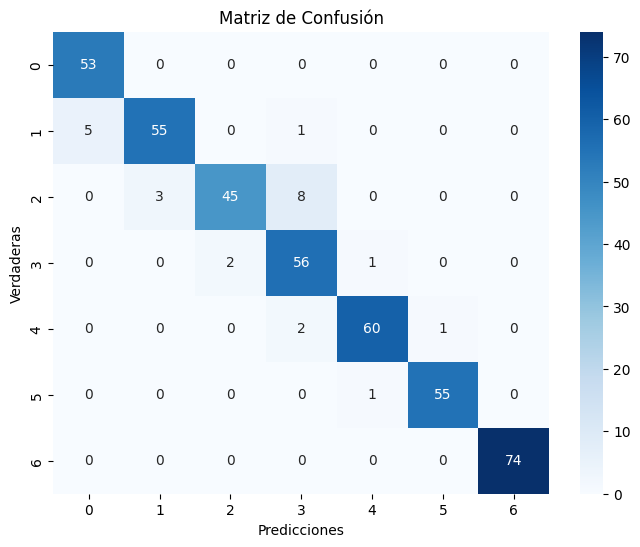

In [ ]:
# Obtenemos predicciones del modelo
y_pred = model.predict(X_test)

# Convertimos las probabilidades a clases
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertimos y_test de formato one-hot a clases
y_test_classes = np.argmax(y_test, axis=1)

# Obtenemos el reporte de clasificación
report = classification_report(y_test_classes, y_pred_classes)
print(report)

# Obtenemos la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicciones')
plt.ylabel('Verdaderas')
plt.title('Matriz de Confusión')
plt.show()


Vemos que tiene resultado muy buenos, probablemente con una mejor arquitectura y una buena seleccion de caracteristicas se podria llegar a los resultados del XGB

Regresion

Para hacer la regresion primero propusimos varias arquitecturas, despues de quedarnos con una hicimos el analisis SHAP para ver la importancia de la caracteristicas, al ver que algunas no aportaban en nada decidimos quitarlas y reentrenar, mejoramos las metricas de esa forma.

In [ ]:
#Estas son las variables que no decian mucho acerca del peso
X=df.drop(["NObeyesdad","Weight","MTRANS_Walking","SMOKE_yes","MTRANS_Bike","MTRANS_Motorbike"],axis=1)
y=df["Weight"]

In [ ]:
#Importamos lo basico por si solo se quiere correr esta parte
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Volvemos a hacer Z-Score aunque por si se cambio algo antes de esta parte
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Creamos un early stopping para detenersos si en algun momento la red ya no esta mejorando su performance
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=20,
                           restore_best_weights=True)

In [ ]:
#La arquitectura que utilizamos es esta
model = Sequential([
    Dense(1024, activation='relu', input_dim=X_train.shape[1]),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128,activation='relu'),
    Dense(1)
])

#Al igual que antes usamos Adam con LR de 0.001
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',#loss='mean_squared_error',
              metrics=['mae'])

model.summary()

14


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_132"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_766 (Dense)                    │ (None, 1024)                │          15,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_767 (Dense)                    │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_768 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_769 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_770 (Dense)                    │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_771 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 721,025 (2.75 MB)

 Trainable params: 721,025 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


#Entrenamos
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stop])

#Evaluamos
loss, mae = model.evaluate(X_test, y_test)
print(f'Error cuadrático medio (MSE): {loss}')
print(f'Error absoluto medio (MAE): {mae}')

#Hacemos la prediccion
y_pred = model.predict(X_test)

#Imprimimos los primeros 5 datos reales y sus predicciones
print("Predicciones:", y_pred[:5])
print("Valores reales:", y_test[:5])

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mae: 0.0539 - val_loss: 0.1132 - val_mae: 0.1869
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mae: 0.0569 - val_loss: 0.1232 - val_mae: 0.2092
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mae: 0.0841 - val_loss: 0.1160 - val_mae: 0.1906
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mae: 0.0897 - val_loss: 0.1491 - val_mae: 0.2193
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0392 - mae: 0.1290 - val_loss: 0.0949 - val_mae: 0.1933
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mae: 0.1120 - val_loss: 0.1152 - val_mae: 0.2016
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mae: 0.0898 - val_loss: 0.1234 - val_mae: 0.1990
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mae: 0.0654 - val_loss: 0.1086 - val_mae: 0.1837
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.008

In [ ]:
from sklearn.metrics import r2_score
# Calculamos el R²
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')



R²: 0.9087309426033363


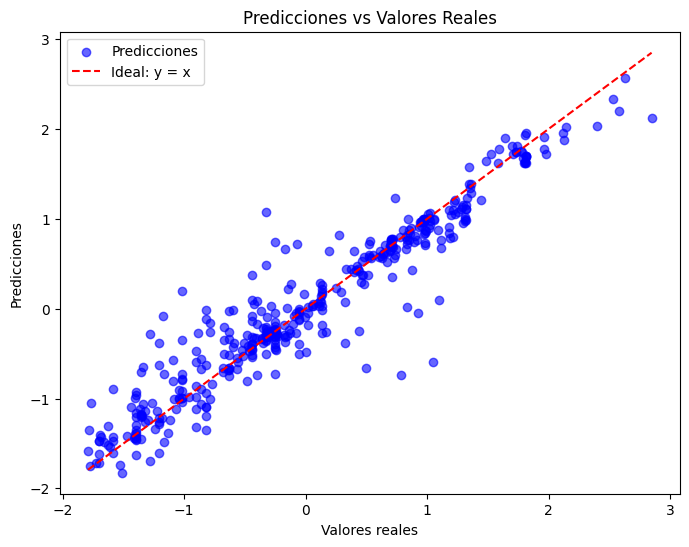

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal: y = x')

plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')

plt.legend()

plt.show()

  Este modelo iguala e incluso supera por por poco al XGB

PermutationExplainer explainer: 423it [01:00,  5.79it/s]
<ipython-input-450-b39ef7d11f7c>:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, feature_names=X.columns)


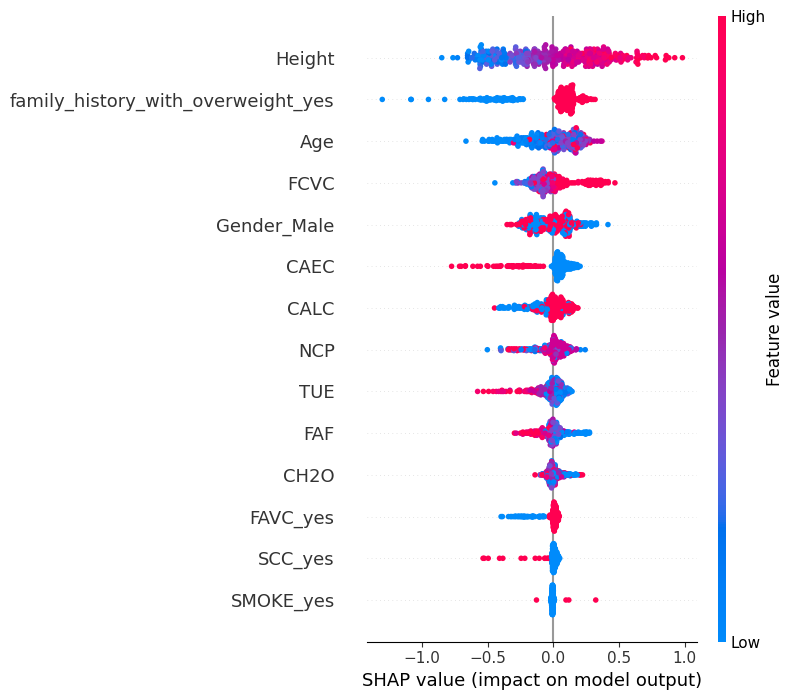

In [ ]:
#Hacemos el analisis SHAP para ver la importancia de las caracteristicas
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)